In [58]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
from scipy import stats

In [59]:
datos = pd.read_csv('..\Recursos\obras_publicas.csv')
datos

,Zona ID,Cantidad gente,Presupuesto,Tipo,Tiempo finalización (días)
0,1,11869.0,26489.34,Acuífero,92
1,2,1830.0,129895.33,Pavimentación,55
2,3,1771.0,34895.74,Camino,97
3,4,1964.0,29028.85,Hospital,33
4,5,NaN,25802.07,Escuela,29
...,...,...,...,...,...
1007,996,984.0,69146.47,Hospital,20
1008,997,916.0,65422.74,Ruta,80
1009,998,NaN,NaN,Hospital,94
1010,999,161.0,67138.90,Luminaria,31


In [60]:
datos.describe()

,Zona ID,Cantidad gente,Presupuesto,Tiempo finalización (días)
count,1012.000000,978.000000,983.000000,1012.000000
mean,500.482213,1987.494888,51078.199400,50.500988
std,289.235663,1445.945382,17484.026119,28.539126
min,1.000000,3.000000,703.830000,1.000000
25%,250.750000,691.500000,33324.065000,26.000000
50%,500.500000,2028.000000,54856.960000,50.000000
75%,750.250000,3095.000000,64002.170000,76.000000
max,1000.000000,11922.000000,136502.540000,100.000000


<AxesSubplot: >

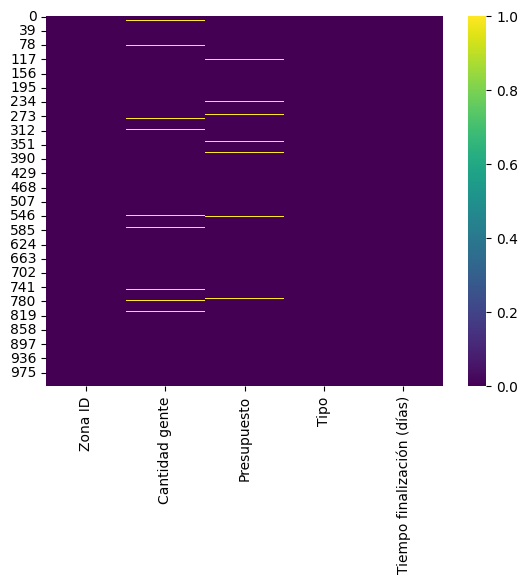

In [61]:
sns.heatmap(datos.isnull(), cmap='viridis')

In [62]:
columnas = list(datos.columns)
columnas

['Zona ID',
 'Cantidad gente',
 'Presupuesto',
 'Tipo',
 'Tiempo finalización (días)']

In [63]:
del(columnas[3])
del(columnas[0])

In [64]:
def verificacion_de_medias(lista):
    test = {}
    for columna in lista:
        w, p = stats.shapiro(datos[columna].dropna())
        test[columna] = p
    return test

In [65]:
verificacion_de_medias(columnas)

{'Cantidad gente': 1.8102277986773243e-31,
 'Presupuesto': 5.991352379458975e-22,
 'Tiempo finalización (días)': 1.6358289383135193e-16}

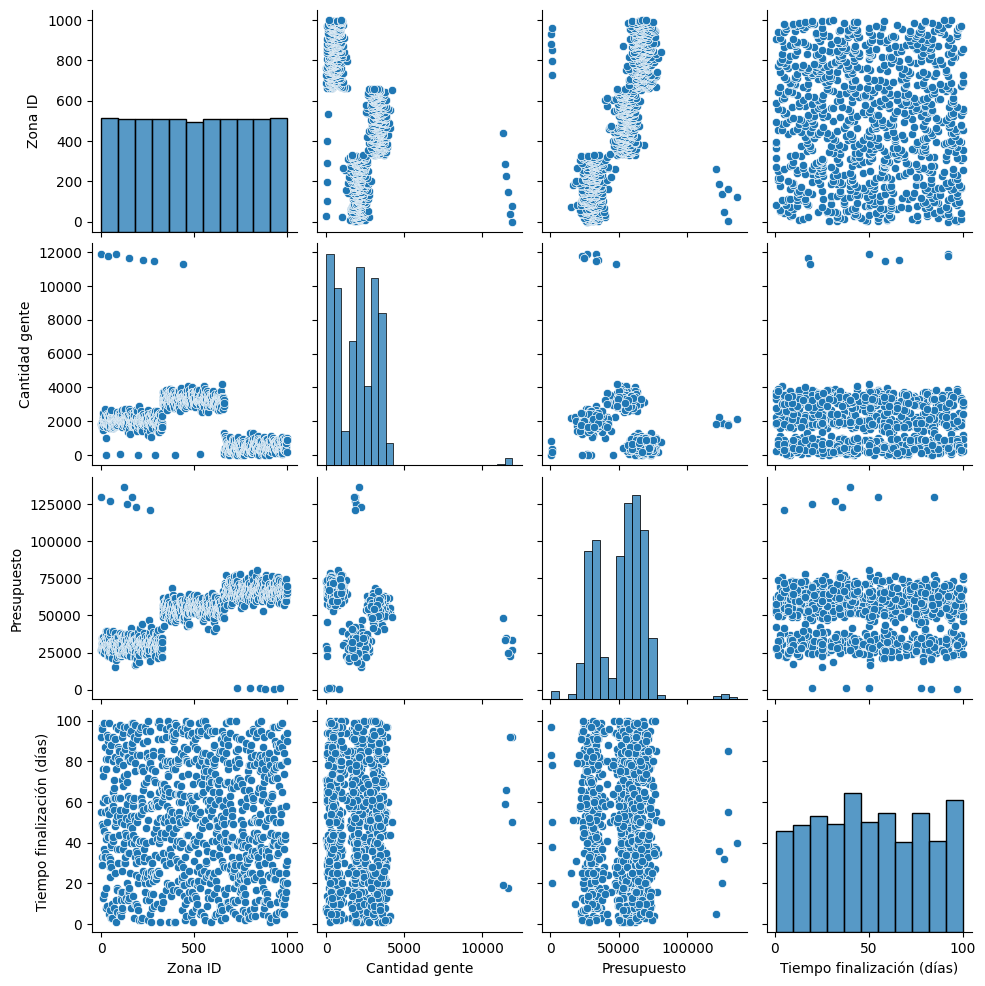

In [66]:
sns.pairplot(datos)

In [67]:
datos.quantile(0.05).to_dict()

C:\Users\IANCHI\AppData\Local\Temp\ipykernel_5116\2204454858.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.quantile(0.05).to_dict()


{'Zona ID': 50.550000000000004,
 'Cantidad gente': 189.85,
 'Presupuesto': 24981.958000000002,
 'Tiempo finalización (días)': 6.0}

In [68]:
Cs2 = datos["Cantidad gente"].quantile(0.95)
Ci2 = datos["Cantidad gente"].quantile(0.05)
Cs3 = datos["Presupuesto"].quantile(0.95)
Ci3 = datos["Presupuesto"].quantile(0.05)

datos1 = datos[(datos["Cantidad gente"] >= Ci2) & (datos["Cantidad gente"] <= Cs2) & (datos["Presupuesto"] >= Ci3) & (datos["Presupuesto"] <= Cs3)].reset_index(drop=True)
datos1

,Zona ID,Cantidad gente,Presupuesto,Tipo,Tiempo finalización (días)
0,3,1771.0,34895.74,Camino,97
1,4,1964.0,29028.85,Hospital,33
2,6,1823.0,30762.98,Hospital,49
3,7,1680.0,31110.20,Luz,96
4,8,2252.0,32402.44,Camino,76
...,...,...,...,...,...
765,995,694.0,64606.55,Luminaria,29
766,995,694.0,64606.55,Luminaria,29
767,996,984.0,69146.47,Hospital,20
768,997,916.0,65422.74,Ruta,80


In [69]:
datos2 = datos1.dropna().reset_index(drop=True)

In [70]:
datos3 = datos2.drop_duplicates().reset_index(drop=True)
datos3

,Zona ID,Cantidad gente,Presupuesto,Tipo,Tiempo finalización (días)
0,3,1771.0,34895.74,Camino,97
1,4,1964.0,29028.85,Hospital,33
2,6,1823.0,30762.98,Hospital,49
3,7,1680.0,31110.20,Luz,96
4,8,2252.0,32402.44,Camino,76
...,...,...,...,...,...
755,994,464.0,65525.65,Luz,58
756,995,694.0,64606.55,Luminaria,29
757,996,984.0,69146.47,Hospital,20
758,997,916.0,65422.74,Ruta,80


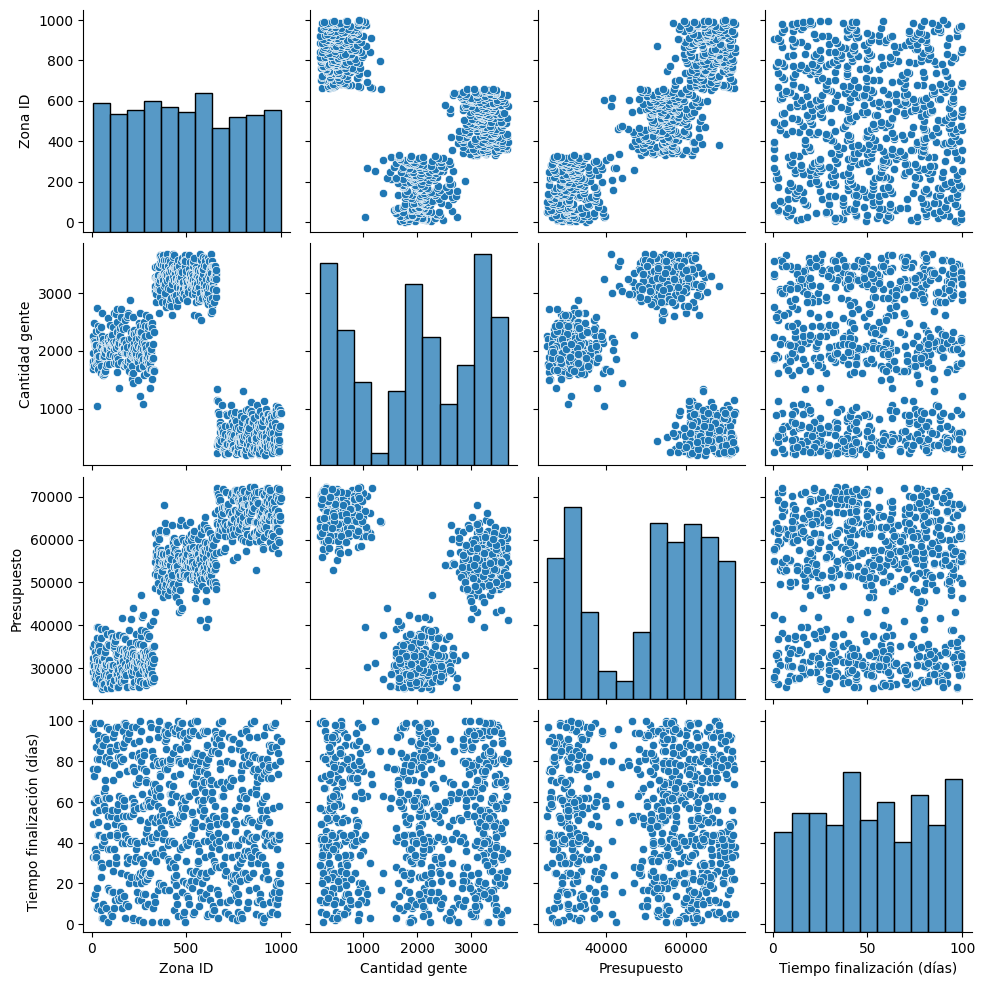

In [71]:
sns.pairplot(datos3)

In [72]:
scaler = StandardScaler()
datos_escaleado = scaler.fit_transform(datos3[columnas])

In [73]:
def inercias_por_k(df_escalado):
    inercias = {}
    for i in range(1,11):
        kmeans = KMeans(n_clusters = i, init="random", n_init=10, max_iter=300, random_state=123457)
        kmeans.fit(df_escalado)
        inercias[i] = kmeans.inertia_
    return inercias

inercias = inercias_por_k(datos_escaleado)
inercias

{1: 2280.0000000000005,
 2: 1330.6046738634523,
 3: 860.8309181865368,
 4: 654.6908321902683,
 5: 480.5360792938222,
 6: 299.33646865609353,
 7: 260.37968133121944,
 8: 219.4530556279759,
 9: 185.19166576048764,
 10: 173.03464662023353}

<AxesSubplot: xlabel='K', ylabel='inercia'>

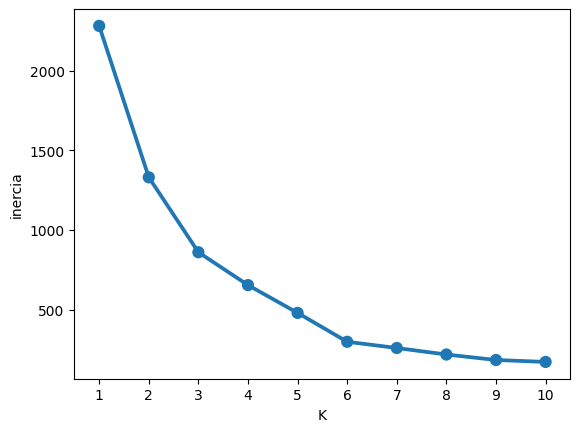

In [74]:
df_inercias = pd.DataFrame(inercias.items(), columns=["K", "inercia"])
sns.pointplot(data = df_inercias, x = "K", y = "inercia")

In [75]:
k = 3
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
kmeans.fit(datos_escaleado)

KMeans(init='random', n_clusters=3, random_state=123457)

<AxesSubplot: >

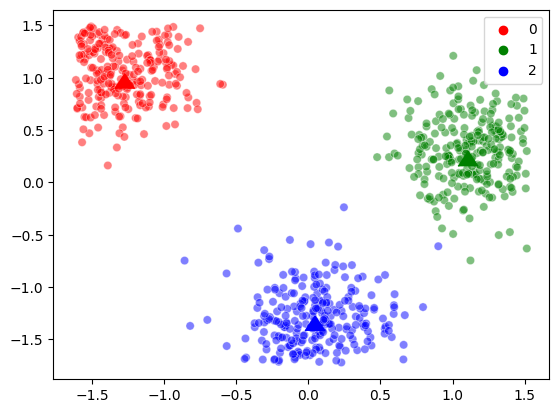

In [103]:
colores = ["red", "green", "blue"]
sns.scatterplot(x = datos_escaleado[:, 0], y = datos_escaleado[:, 1], hue = kmeans.labels_, palette = colores, alpha = 0.5)
sns.scatterplot(x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 1], zorder = 10, palette = colores, hue = [0, 1, 2], legend = False, marker=6, s=200)

In [83]:
silhouette_avg = silhouette_score(datos_escaleado, kmeans.labels_)
sample_silhouette_values = silhouette_samples(datos_escaleado, kmeans.labels_)

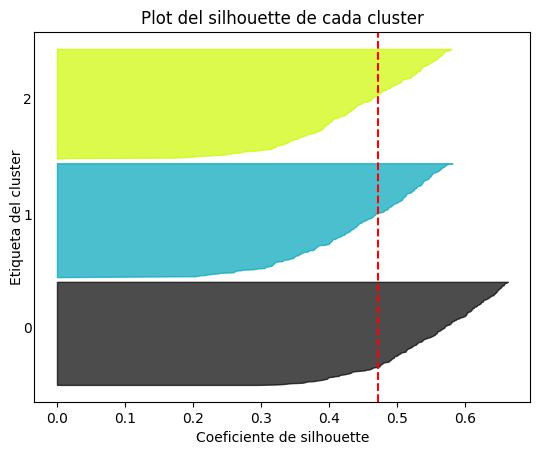

In [84]:
def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])

graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

In [88]:
datos3['labels'] = kmeans.labels_
datos3

,Zona ID,Cantidad gente,Presupuesto,Tipo,Tiempo finalización (días),labels
0,3,1771.0,34895.74,Camino,97,2
1,4,1964.0,29028.85,Hospital,33,2
2,6,1823.0,30762.98,Hospital,49,2
3,7,1680.0,31110.20,Luz,96,2
4,8,2252.0,32402.44,Camino,76,2
...,...,...,...,...,...,...
755,994,464.0,65525.65,Luz,58,0
756,995,694.0,64606.55,Luminaria,29,0
757,996,984.0,69146.47,Hospital,20,0
758,997,916.0,65422.74,Ruta,80,0


In [90]:
grupo0 = datos3[datos3['labels'] == 0]
grupo1 = datos3[datos3['labels'] == 1]
grupo2 = datos3[datos3['labels'] == 2]

In [93]:
grupo0['Presupuesto'].sum()/grupo0['Cantidad gente'].sum()

114.32848086289367

In [94]:
grupo1['Presupuesto'].sum()/grupo1['Cantidad gente'].sum()

16.94242552779007

In [95]:
grupo2['Presupuesto'].sum()/grupo2['Cantidad gente'].sum()

15.471999421324021

In [99]:
grupo1['Cantidad gente'].sum()

856259.0

In [100]:
grupo2['Cantidad gente'].sum()

521881.0

In [101]:
#Se deberia de realizar obras en las zonas con label 1 ya que son las que afectan a mas personas y tienen un presupuesto por persona bajo. 
#El grafico de codo nos dice que no hay un k adecuado.